<a href="https://colab.research.google.com/github/usneek/Blog-sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

from gensim.models import Word2Vec
import time
import numpy as np
import nltk
from nltk.corpus import stopwords
import regex as re

from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 70% 57.0M/80.9M [00:00<00:00, 116MB/s]
100% 80.9M/80.9M [00:00<00:00, 149MB/s]


In [ ]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


# Load Data

In [ ]:
dataframe=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')
dataframe.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
dataframe=dataframe.drop(['Mon Apr 06 22:19:45 PDT 2009'], axis = 1)
dataframe=dataframe.drop(['NO_QUERY'], axis = 1)
dataframe=dataframe.drop(['_TheSpecialOne_'], axis = 1)

In [ ]:
dataframe.rename(columns = {'0':'Label','1467810369':'ID',"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'Data'}, inplace = True)

# WordCloud (Before Processing)

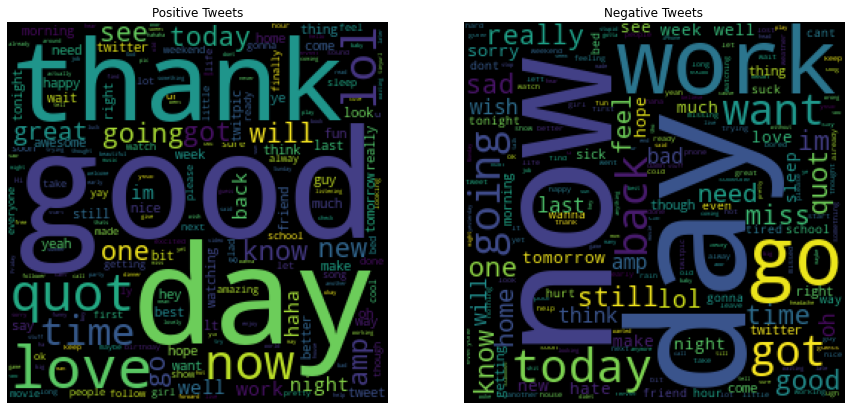

In [ ]:
positive = " ".join(dataframe[dataframe['Label'] == 4]['Data'].to_list())
# neutral = " ".join(dataframe[dataframe['Label'] == 2]['Data'].to_list())
negative = " ".join(dataframe[dataframe['Label'] == 0]['Data'].to_list())

fig, ax = plt.subplots(1, 2, figsize=(15,15))
pos_cloud = WordCloud(width=256, height=256, collocations=False).generate(positive)
# neut_cloud = WordCloud(width=256, height=256, collocations=False).generate(neutral)
neg_cloud = WordCloud(width=256, height=256, collocations=False).generate(negative)
clouds = [pos_cloud, neg_cloud]
titles = ["Positive Tweets", "Negative Tweets"]

for no, x in enumerate(clouds):
    ax[no].imshow(x)
    ax[no].axis('off')
    ax[no].set_title(titles[no])

# Preprocessing 
The final dataframe comprises processed sentences, NOT lists.

In [ ]:
def remove_urls(text):
  
    prog = re.compile(r'https?:\/\/\S+|www\.\S+')
    text_processed =  prog.sub(r'', text)
    return text_processed

In [ ]:
def lower(text):
  
    text_processed = text.lower()
    return text_processed

In [ ]:
def remove_num(text):
    text_processed = re.sub(r'\d+', '', text)
    return text_processed

In [ ]:
def remove_punc(text):
 
    text_processed = re.sub(r"[^\w\s\d]","", text)
    return text_processed

In [ ]:
stops = stopwords.words("english")

In [ ]:
def remove_stopwords(text):
   
    return " ".join([word for word in str(text).split() if word not in stops])

In [ ]:
def remove_space(text):
  
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove

In [ ]:
def make_list(text):
  
    lst = text.split(" ")
    return lst

In [ ]:
def clean_text(data):
  
    data['Data']=data['Data'].apply(lambda x:remove_urls(x))
    data['Data']=data['Data'].apply(lambda x:lower(x))
    data['Data']=data['Data'].apply(lambda x:remove_num(x))
    data['Data']=data['Data'].apply(lambda x:remove_punc(x))
    data['Data']=data['Data'].apply(lambda x:remove_stopwords(x))
    data['Data']=data['Data'].apply(lambda x:remove_space(x))
    return data

In [ ]:
# dataframe=dataframe.iloc[0:1000]

In [ ]:
dataframe = clean_text(dataframe)

# WordCloud (After Processing)

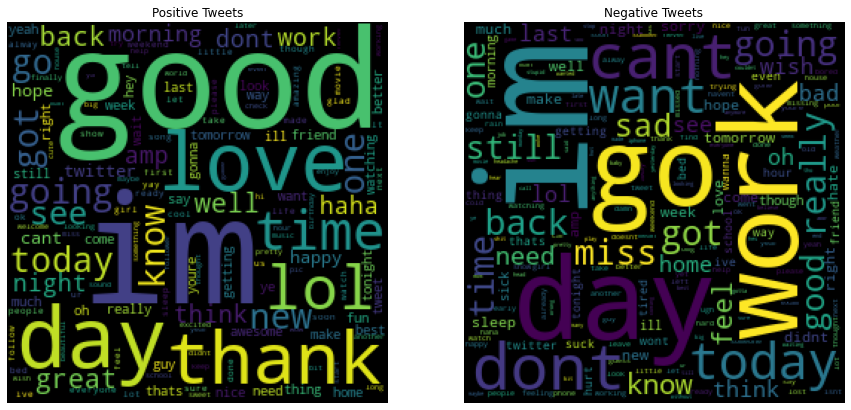

In [ ]:
positive = " ".join(dataframe[dataframe['Label'] == 4]['Data'].to_list())
# neutral = " ".join(dataframe[dataframe['Label'] == 2]['Data'].to_list())
negative = " ".join(dataframe[dataframe['Label'] == 0]['Data'].to_list())

fig, ax = plt.subplots(1, 2, figsize=(15,15))
pos_cloud = WordCloud(width=256, height=256, collocations=False).generate(positive)
# neut_cloud = WordCloud(width=256, height=256, collocations=False).generate(neutral)
neg_cloud = WordCloud(width=256, height=256, collocations=False).generate(negative)
clouds = [pos_cloud, neg_cloud]
titles = ["Positive Tweets", "Negative Tweets"]

for no, x in enumerate(clouds):
    ax[no].imshow(x)
    ax[no].axis('off')
    ax[no].set_title(titles[no])

# Reduce Dataset Size for Convenience

In [ ]:
dataframe=dataframe.iloc[0:1000]

# Tf-Idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
train_X = dataframe['Data']
X_train_tf = tf_idf.fit_transform(train_X)
X_train_tf = tf_idf.transform(train_X)
print("n_samples: %d, n_features: %d" % X_train_tf.shape)
X_train_tf = X_train_tf.toarray()

n_samples: 1000, n_features: 3235


In [ ]:
dataframe

,Label,ID,Data
0,0,1467810672,upset cant update facebook texting might cry r...
1,0,1467810917,kenichan dived many times ball managed save re...
2,0,1467811184,whole body feels itchy like fire
3,0,1467811193,nationwideclass behaving im mad cant see
4,0,1467811372,kwesidei whole crew
...,...,...,...
995,0,1468055266,t_wolfe miss u im totally comin back tho lastn...
996,0,1468055472,sniffinglue ohhh love ps im sad didnt get hang
997,0,1468055604,somehow still end place
998,0,1468055791,kisluvkis oh sad poor boy


In [ ]:
list_external=[]
for i in range(dataframe.shape[0]):
    dictinary=dict(zip(tf_idf.get_feature_names(), X_train_tf[i]))
    array=dataframe.iloc[i][2].split(" ")
    list_internal=[]
    for j in array:
        if j in dictinary:
            list_internal.append(dictinary[j])
        else:
           list_internal.append(0.0)
    list_external.append(np.asarray(list_internal))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_score = np.array(list_external)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


# Sentiment Scores

In [ ]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
list(swn.senti_synsets('slow'))
sentence='It was a really good day'
from nltk.tag import pos_tag
token = nltk.word_tokenize(sentence)
after_tagging = nltk.pos_tag(token)
print (token)
print (after_tagging)
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
sentiment = 0.0
tokens_count = 0
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['It', 'was', 'a', 'really', 'good', 'day']
[('It', 'PRP'), ('was', 'VBD'), ('a', 'DT'), ('really', 'RB'), ('good', 'JJ'), ('day', 'NN')]


In [ ]:
def sentiment_value(after_tagging):
  sentiment_vector=[]
  for word, tag in after_tagging:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                sentiment_vector.append(1.0)
                continue
  
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                sentiment_vector.append(1.0)
                continue
 
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                sentiment_vector.append(1.0)
                continue
 
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment_vector.append(1+swn_synset.pos_score() + swn_synset.neg_score())
  return sentiment_vector

In [ ]:
sentiments=[]
for i in dataframe['Data']:
  sentence=i
  token = make_list(sentence)
  after_tagging = nltk.pos_tag(token)
  sentiments.append(np.array(sentiment_value(after_tagging)))

In [ ]:
sentiment_score = np.array(sentiments)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


# Reduce Dataframe to List of Words

In [ ]:
dataframe['Data']=dataframe['Data'].apply(lambda x:make_list(x))

In [ ]:
dataframe

,Label,ID,Data
0,0,1467810672,"[upset, cant, update, facebook, texting, might..."
1,0,1467810917,"[kenichan, dived, many, times, ball, managed, ..."
2,0,1467811184,"[whole, body, feels, itchy, like, fire]"
3,0,1467811193,"[nationwideclass, behaving, im, mad, cant, see]"
4,0,1467811372,"[kwesidei, whole, crew]"
...,...,...,...
995,0,1468055266,"[t_wolfe, miss, u, im, totally, comin, back, t..."
996,0,1468055472,"[sniffinglue, ohhh, love, ps, im, sad, didnt, ..."
997,0,1468055604,"[somehow, still, end, place]"
998,0,1468055791,"[kisluvkis, oh, sad, poor, boy]"


# Word2Vec

In [ ]:
# Skip-gram model (sg = 1)
size = 300
window = 3
min_count = 1
workers = 3
sg = 1
OUTPUT_FOLDER = "/content/drive/MyDrive/IR assignment/"

word2vec_model_file = OUTPUT_FOLDER + 'word2vec_' + str(size) + '.model'
start_time = time.time()
stemmed_tokens = pd.Series(dataframe['Data']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
w2v_model.save(word2vec_model_file)


Time taken to train word2vec model: 0.9655640125274658


In [ ]:
# Load the model from the model file
word2vec_model_file='/content/drive/MyDrive/IR assignment/word2vec_300.model'
sg_w2v_model = Word2Vec.load(word2vec_model_file)
# Total number of the words 
print(len(sg_w2v_model.wv.vocab))
# Get the mean for the vectors for an example review
print("Print the length after taking average of all word vectors in a sentence:")
print(np.mean([sg_w2v_model[token] for token in dataframe['Data'][0]], axis=0).shape)

3247
Print the length after taking average of all word vectors in a sentence:
(300,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
word2vec = []
for i in range(len(dataframe)):
  word2vec.append(np.array([sg_w2v_model[token] for token in dataframe['Data'][i]]))
word2vec = np.asarray(word2vec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


# Dot Products

In [ ]:
temp=[]
for i in range(1000):
  if(sentiment_score[i].shape==tfidf_score[i].shape):
    t=np.multiply(sentiment_score[i],tfidf_score[i])
    temp.append(t)

In [ ]:
temp=np.asarray(temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
import tensorflow as tf
x=tf.keras.preprocessing.sequence.pad_sequences(
    temp,
    maxlen=None,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

In [ ]:
x=np.reshape(x,(1000,20,1))

In [ ]:
w=tf.keras.preprocessing.sequence.pad_sequences(
    word2vec,
    maxlen=None,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

In [ ]:
d=np.tile(x,(1,1,300))

In [ ]:
final=np.multiply(x,w)

# Train Test Split

In [ ]:
test_size=0.2
shuffle_state=True
X_train, X_test, Y_train, Y_test = train_test_split(dataframe[['Data']], 
                                                        dataframe['Label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)